In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/whats-cooking-kernels-only/sample_submission.csv.zip
/kaggle/input/whats-cooking-kernels-only/train.json
/kaggle/input/whats-cooking-kernels-only/test.json


# Import NLTK

In [4]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /usr/share/nltk_data...
[nltk_data]    | Downloading pa

True

In [5]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/ #to unzip wordnet for kaggle 

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [6]:
#basic pakages
import pandas as pd
import numpy as np

In [7]:
#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [8]:
train = pd.read_json('/kaggle/input/whats-cooking-kernels-only/train.json')
test = pd.read_json('/kaggle/input/whats-cooking-kernels-only/test.json')

In [9]:
train

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [10]:
test

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."
...,...,...
9939,30246,"[large egg yolks, fresh lemon juice, sugar, bo..."
9940,36028,"[hot sauce, butter, sweet potatoes, adobo sauc..."
9941,22339,"[black pepper, salt, parmigiano reggiano chees..."
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato..."


In [11]:
train.shape,  test.shape #look at data shape

((39774, 3), (9944, 2))

In [12]:
train.isnull().sum()#check for missing value

id             0
cuisine        0
ingredients    0
dtype: int64

# Visualization

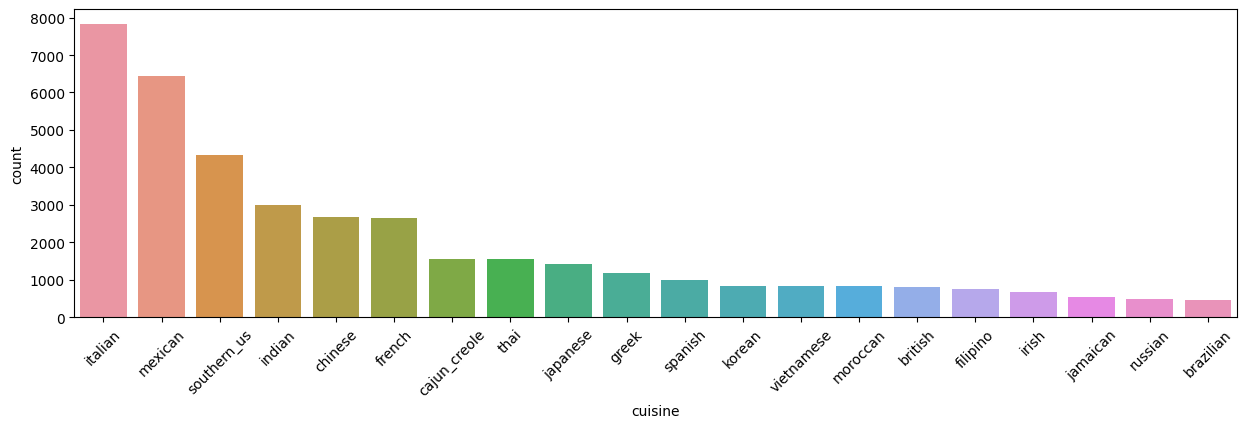

In [13]:
# Target Variables (Cuisines) 
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
ax= sns.countplot(x='cuisine', data= train, order = train.cuisine.value_counts().index )

We can see Italian cusine is the most popular among other cuisines 

/tmp/ipykernel_18/393779676.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train['number of ingredients'], shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distibution plot for number of ingredients')

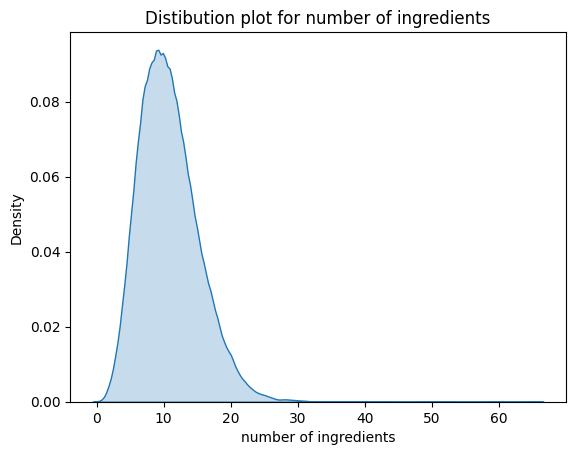

In [15]:
train['number of ingredients'] = train['ingredients'].str.len() #number of ingredients needed for different cuisine
sns.kdeplot(data=train['number of ingredients'], shade=True)
plt.title('Distibution plot for number of ingredients')

<Axes: xlabel='number of ingredients', ylabel='count'>

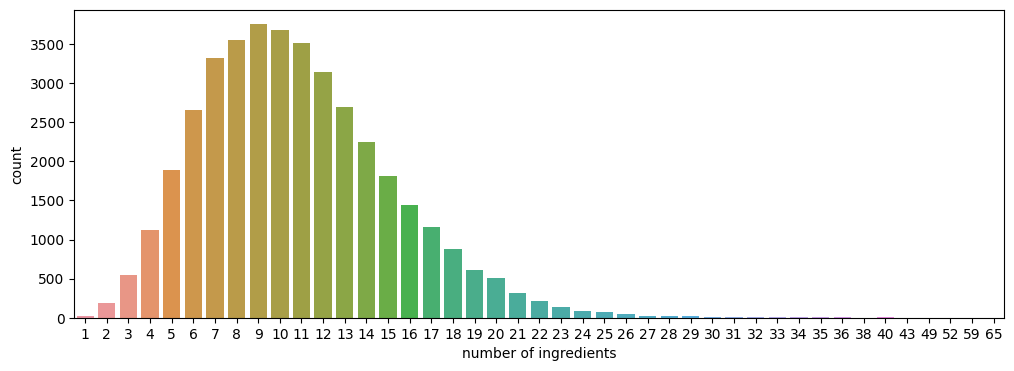

In [16]:
plt.figure(figsize=(12,4))
sns.countplot(data=train, x='number of ingredients')

We can see that most cuisines used avaragely 9 ingredients 

In [17]:
#Most common ingredients
ingredients_list = [ing for ingredient in train['ingredients'] for ing in ingredient]

In [18]:
from collections import Counter
ingredients_count = pd.Series(dict(Counter(','.join(ingredients_list).split(',')))).sort_values(ascending=False)

In [19]:
ingredients_count# ingredient that used most in the dataset

salt                                  18049
olive oil                              7972
onions                                 7972
water                                  7457
garlic                                 7380
                                      ...  
osetra caviar                             1
loose leaf black tea                      1
pepperidge farm puff pastry sheets        1
dark crème de cacao                       1
crushed cheese crackers                   1
Length: 6725, dtype: int64

We can see that salt is an ingredients that used most in this dataset

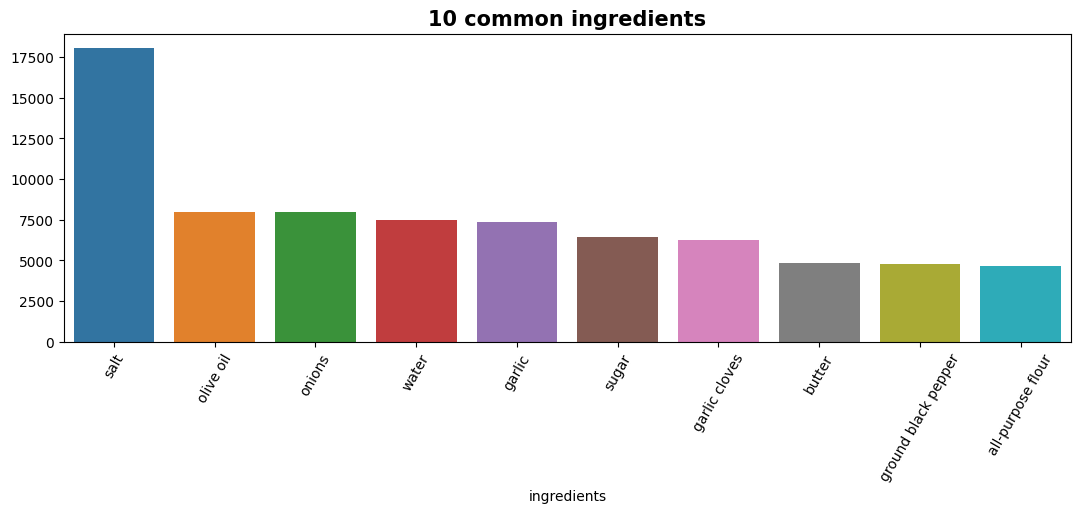

In [20]:
plt.figure(figsize=(13,4))
plt.xticks(rotation=60)
sns.barplot(x = ingredients_count.head(10).index, y=ingredients_count.head(10))
plt.title('10 common ingredients', fontsize=15, fontweight='bold')
plt.xlabel('ingredients')
plt.show()


# Preprocessing

In [21]:
import re
from num2words import num2words
from string import punctuation
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()
stop_words = set(nltk.corpus.stopwords.words('english'))
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ,"R":wordnet.ADV}

In [22]:
def clean_html(text):
  CLEANR = re.compile('<.*?>') 
  text = re.sub(CLEANR, '', text)
  return text

#join ingredients into a string
def join_string(text):
    return ' '.join(text)#join ingredients into a string

#remove punctuations in a string
def strip_punctuation(text):
    return ''.join(c for c in text if c not in punctuation)+' ' 

 #remove stop words
def remove_stopwords(text):
    return [word for word in word_tokenize(text) if not word in stop_words]


#lemmatize words
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return ' '.join([lemmatizer.lemmatize(word,wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])


In [23]:
#train['processed'] = train['ingredients'].apply(join_string)
#train['processed'] = train['processed'].astype('str').apply(to_number)
#train['processed'] = train['processed'].str.lower()
#train['processed'] = train['processed'].astype('str').apply(clean_html)
#train['processed'] = train['processed'].astype('str').apply(remove_stopwords)
#train['processed'] = train['processed'].astype('str').apply(strip_punctuation)
#train['processed'] = train['processed'].astype('str').apply(lemmatize_words)

#test['processed'] = test['ingredients'].apply(join_string)
#test['processed'] = test['processed'].astype('str').apply(to_number)
#test['processed'] = test['processed'].str.lower()
#test['processed'] = test['processed'].astype('str').apply(clean_html)
#test['processed'] = test['processed'].astype('str').apply(remove_stopwords)
#test['processed'] = test['processed'].astype('str').apply(strip_punctuation)
#test['processed'] = test['processed'].astype('str').apply(lemmatize_words)

I choose to remove numbers instead of changing numbers to words

In [24]:
train['processed'] = train['ingredients'].apply(join_string)
train['processed'] = train['processed'].str.replace('\d+', '')
train['processed'] = train['processed'].str.lower()
train['processed'] = train['processed'].astype('str').apply(clean_html)
train['processed'] = train['processed'].astype('str').apply(remove_stopwords)
train['processed'] = train['processed'].astype('str').apply(strip_punctuation)
train['processed'] = train['processed'].astype('str').apply(lemmatize_words)

test['processed'] = test['ingredients'].apply(join_string)
test['processed'] = test['processed'].str.replace('\d+', '')
test['processed'] = test['processed'].str.lower()
test['processed'] = test['processed'].astype('str').apply(clean_html)
test['processed'] = test['processed'].astype('str').apply(remove_stopwords)
test['processed'] = test['processed'].astype('str').apply(strip_punctuation)
test['processed'] = test['processed'].astype('str').apply(lemmatize_words)

In [25]:
train['processed']

0        romaine lettuce black olives grape tomato garl...
1        plain flour ground pepper salt tomato grind bl...
2        egg pepper salt mayonaise cooking oil green ch...
3                           water vegetable oil wheat salt
4        black pepper shallot cornflour cayenne pepper ...
                               ...                        
39769    light brown sugar granulate sugar butter warm ...
39770    kraft zesty italian dress purple onion broccol...
39771    egg citrus fruit raisin sourdough starter flou...
39772    boneless chicken skinless thigh mince garlic s...
39773    green chile jalapeno chilies onions ground bla...
Name: processed, Length: 39774, dtype: object

# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train,y_val = train_test_split(train['processed'], train['cuisine'], test_size=0.2, random_state = 88)

# Feature Extraction

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True) 
# sublinear_tf scaling addresses the problem that 20 occurrences of a word is probably not 20 times more important than 1 occurrence
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)


In [30]:
#Label Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Models 

In [31]:
from sklearn.metrics import classification_report as CR
from sklearn.naive_bayes import BernoulliNB as NB
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import LinearSVC as SVM
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.linear_model import Perceptron as P
from sklearn.multiclass import OneVsRestClassifier

nb=NB(alpha=.1)
lr=LR(penalty='l2', max_iter=500, C=1, random_state=42)
svm=SVM(penalty='l2', max_iter=100, C=1, random_state=42)
sgd=SGD(loss='hinge', penalty="l2", max_iter=500, random_state=42)
rfc=RFC(n_estimators=50, random_state=42)
gbc=GBC(n_estimators=50, random_state=42)
p = OneVsRestClassifier(P(tol=1e-3, random_state=0))

models=[nb, lr,svm, sgd, rfc, gbc, p]

def fit(x1,y1,x2,y2):
    for model in models:
        model.fit(x1,y1)
        print(model)
        mypred=model.predict(x2)
        mypred = label_encoder.inverse_transform(mypred)
        print(CR(mypred, y2))


fit(X_train,y_train, X_val, y_val)

BernoulliNB(alpha=0.1)
              precision    recall  f1-score   support

   brazilian       0.52      0.40      0.45       103
     british       0.55      0.27      0.36       319
cajun_creole       0.72      0.58      0.64       379
     chinese       0.78      0.81      0.79       487
    filipino       0.62      0.52      0.57       185
      french       0.46      0.55      0.50       465
       greek       0.72      0.63      0.67       261
      indian       0.84      0.87      0.86       577
       irish       0.52      0.49      0.50       137
     italian       0.76      0.86      0.81      1405
    jamaican       0.66      0.77      0.71        97
    japanese       0.65      0.74      0.69       245
      korean       0.73      0.80      0.76       163
     mexican       0.86      0.93      0.89      1187
    moroccan       0.75      0.69      0.72       174
     russian       0.43      0.35      0.38       110
 southern_us       0.66      0.60      0.63       947
    

I choose to use SVM for predicting the test data because it has the highest accuracy.

In [32]:
X_train1 = vectorizer.fit_transform(train['processed'])
X_test1 = vectorizer.transform(test['processed'])


In [33]:
label_encoder = LabelEncoder()
y_train1 = train['cuisine']
y_train1 = label_encoder.fit_transform(y_train1)

In [34]:
svm=SVM( max_iter=100, C=1, random_state=42)
svm.fit(X_train1, y_train1)# use the train data to train the model
mypred=svm.predict(X_test1)
mypred=label_encoder.inverse_transform(mypred)

# Submission

In [35]:
test_id = test['id']
submission = pd.DataFrame({'id': test_id, 'cuisine': mypred}, columns=['id', 'cuisine'])
submission.to_csv('submission.csv', index=False)